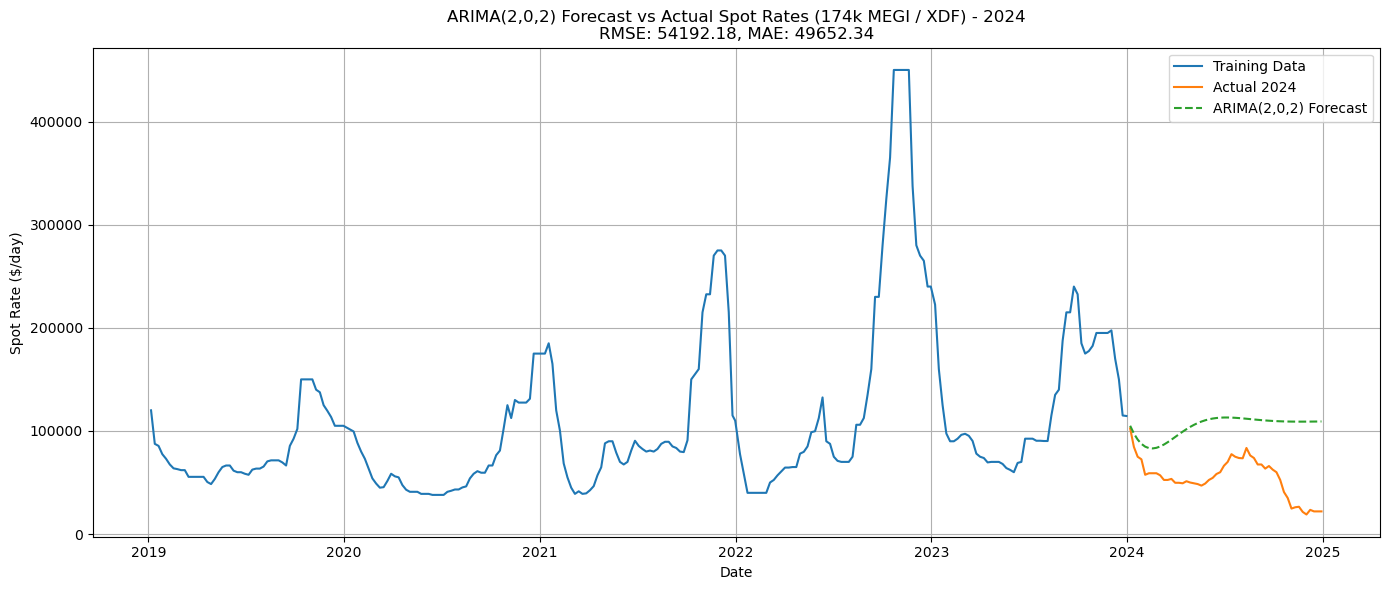

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Load and clean the data
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")
df['174k MEGI / XDF'] = df['174k MEGI / XDF'].str.replace(' ', '').astype(float)
df = df.sort_values('Date')

# Step 2: Train/Test split
train_data = df[df['Date'] < '2024-01-01'].copy()
test_data = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-12-31')].copy()

# Step 3: Fit ARIMA(2,0,2)
model_202 = ARIMA(train_data['174k MEGI / XDF'], order=(2, 0, 2))
fitted_202 = model_202.fit()

# Step 4: Forecast and evaluate
forecast_202 = fitted_202.forecast(steps=len(test_data))
forecast_202.index = test_data.index
rmse_202 = np.sqrt(mean_squared_error(test_data['174k MEGI / XDF'], forecast_202))
mae_202 = mean_absolute_error(test_data['174k MEGI / XDF'], forecast_202)

# Step 5: Plot
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['174k MEGI / XDF'], label='Training Data')
plt.plot(test_data['Date'], test_data['174k MEGI / XDF'], label='Actual 2024')
plt.plot(test_data['Date'], forecast_202, label='ARIMA(2,0,2) Forecast', linestyle='--')
plt.title(f'ARIMA(2,0,2) Forecast vs Actual Spot Rates (174k MEGI / XDF) - 2024\nRMSE: {rmse_202:.2f}, MAE: {mae_202:.2f}')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


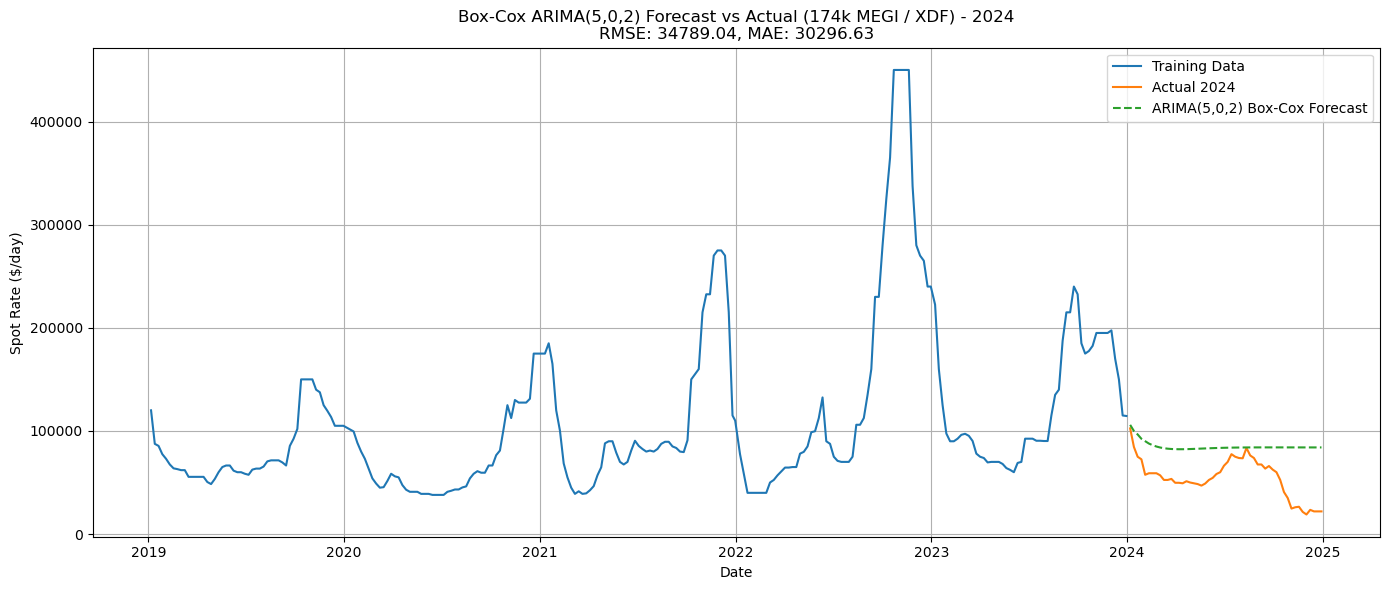

RMSE: 34789.04
MAE: 30296.63
Box-Cox Lambda: -0.5250


In [13]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# --- Load & Clean Data ---
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")
df['174k MEGI / XDF'] = df['174k MEGI / XDF'].str.replace(' ', '').astype(float)
df = df.sort_values('Date')

# --- Split into Train & Test ---
train_data = df[df['Date'] < '2024-01-01'].copy()
test_data = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-12-31')].copy()

# --- Apply Box-Cox Transformation ---
train_bc, lambda_bc = boxcox(train_data['174k MEGI / XDF'])
test_bc = test_data['174k MEGI / XDF']  # keep original for evaluation

# --- Fit ARIMA(5,0,2) on Box-Cox Data ---
bc_model_502 = ARIMA(train_bc, order=(5, 0, 2))
bc_fitted_502 = bc_model_502.fit()

# --- Forecast & Inverse Transform ---
bc_forecast = bc_fitted_502.forecast(steps=len(test_data))
bc_forecast_series = pd.Series(bc_forecast, index=test_data.index)
forecast_inv_bc = inv_boxcox(bc_forecast_series, lambda_bc)

# --- Evaluation ---
rmse_bc = np.sqrt(mean_squared_error(test_bc, forecast_inv_bc))
mae_bc = mean_absolute_error(test_bc, forecast_inv_bc)

# --- Plot Results ---
plt.figure(figsize=(14, 6))
plt.plot(train_data['Date'], train_data['174k MEGI / XDF'], label='Training Data')
plt.plot(test_data['Date'], test_data['174k MEGI / XDF'], label='Actual 2024')
plt.plot(test_data['Date'], forecast_inv_bc, label='ARIMA(5,0,2) Box-Cox Forecast', linestyle='--')
plt.title(f'Box-Cox ARIMA(5,0,2) Forecast vs Actual (174k MEGI / XDF) - 2024\nRMSE: {rmse_bc:.2f}, MAE: {mae_bc:.2f}')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Print Metrics ---
print(f"RMSE: {rmse_bc:.2f}")
print(f"MAE: {mae_bc:.2f}")
print(f"Box-Cox Lambda: {lambda_bc:.4f}")


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import scipy.stats as stats

# --- Load and clean the data ---
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")
df['174k MEGI / XDF'] = df['174k MEGI / XDF'].str.replace(' ', '').astype(float)
df = df.sort_values('Date')

# --- Train/test split ---
train_data = df[df['Date'] < '2024-01-01'].copy()
test_data = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-12-31')].copy()

# --- Box-Cox transformation ---
train_bc, lambda_bc = boxcox(train_data['174k MEGI / XDF'])
test_bc = test_data['174k MEGI / XDF']  # for evaluation only

# --- Fit ARIMA(5,0,2) ---
model_502 = ARIMA(train_bc, order=(5, 0, 2))
fitted_502 = model_502.fit()

# --- Forecast and inverse transform ---
forecast_bc = fitted_502.forecast(steps=len(test_data))
forecast_exp = inv_boxcox(forecast_bc, lambda_bc)

# --- Evaluate (optional) ---
rmse = np.sqrt(mean_squared_error(test_bc, forecast_exp))
mae = mean_absolute_error(test_bc, forecast_exp)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# --- Residuals ---
residuals_502 = fitted_502.resid

# 1. Residual time series plot
plt.figure(figsize=(12, 4))
plt.plot(residuals_502)
plt.title("Residuals from ARIMA(5,0,2) Model")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.savefig("arima_residuals.pdf")
plt.close()

# 2. ACF of residuals
plt.figure(figsize=(8, 4))
plot_acf(residuals_502, lags=40)
plt.title("ACF of Residuals")
plt.tight_layout()
plt.savefig("acf_residuals.pdf")
plt.close()

# 3. Histogram and Q-Q plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram
sns.histplot(residuals_502, kde=True, ax=axs[0], stat='density')
axs[0].set_title("Histogram of Residuals")

# Q-Q plot
stats.probplot(residuals_502, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.savefig("residual_distribution.pdf")
plt.close()


RMSE: 34789.04
MAE: 30296.63


<Figure size 800x400 with 0 Axes>

In [20]:
from IPython.display import display, Image

# Convert to PNG and display (if needed)
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.pyplot as plt
import io

# Preview residual time series
from IPython.display import IFrame
IFrame("arima_residuals.pdf", width=800, height=400)


C:\Users\Eier\AppData\Local\Temp\ipykernel_22608\1599504388.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Date').resample('M').mean(numeric_only=True).reset_index()


Rolling ARIMA(2,0,2) Monthly Forecast RMSE: 17915.46
Rolling ARIMA(2,0,2) Monthly Forecast MAE: 16003.73


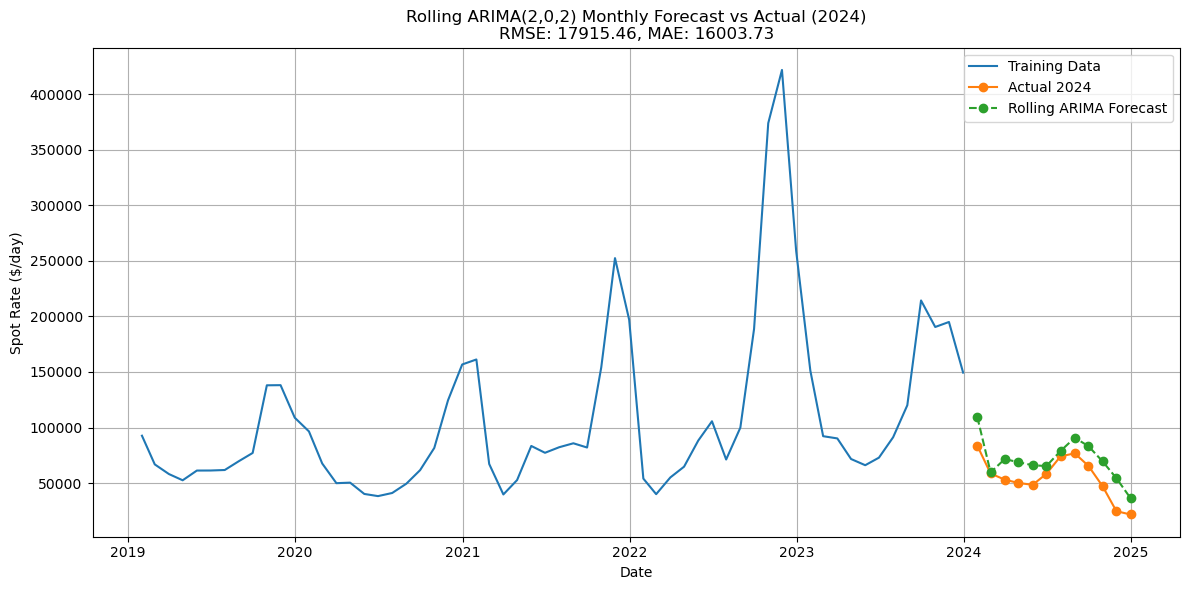

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Load and clean the dataset ---
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")

# Clean numeric column (remove spaces, convert to float)
df['174k MEGI / XDF'] = (
    df['174k MEGI / XDF']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .astype(float)
)

# --- Resample to monthly frequency using average ---
df_monthly = df.set_index('Date').resample('M').mean(numeric_only=True).reset_index()

# --- Split into training (pre-2024) and test (2024) monthly data ---
train_monthly = df_monthly[df_monthly['Date'] < '2024-01-01'].copy()
test_monthly = df_monthly[(df_monthly['Date'] >= '2024-01-01') & (df_monthly['Date'] <= '2024-12-31')].copy()

# Prepare an empty list to store the rolling forecasts
rolling_predictions = []
train_rolling = train_monthly.copy()

# --- Rolling 1-month-ahead forecast for each month in 2024 ---
for idx, row in test_monthly.iterrows():
    model = ARIMA(train_rolling['174k MEGI / XDF'], order=(2, 0, 2))
    fitted = model.fit()
    pred = fitted.forecast(steps=1)
    rolling_predictions.append(pred.iloc[0])

    # Add the actual observed value for the forecasted month
    new_row = pd.DataFrame({
        'Date': [row['Date']],
        '174k MEGI / XDF': [row['174k MEGI / XDF']]
    })
    train_rolling = pd.concat([train_rolling, new_row], ignore_index=True)

# Convert predictions to a Series
pred_series = pd.Series(rolling_predictions, index=test_monthly['Date'])

# --- Evaluate forecast performance ---
rmse = np.sqrt(mean_squared_error(test_monthly['174k MEGI / XDF'], pred_series))
mae = mean_absolute_error(test_monthly['174k MEGI / XDF'], pred_series)

print(f"Rolling ARIMA(2,0,2) Monthly Forecast RMSE: {rmse:.2f}")
print(f"Rolling ARIMA(2,0,2) Monthly Forecast MAE: {mae:.2f}")

# --- Plot actual vs forecast ---
plt.figure(figsize=(12, 6))
plt.plot(train_monthly['Date'], train_monthly['174k MEGI / XDF'], label='Training Data')
plt.plot(test_monthly['Date'], test_monthly['174k MEGI / XDF'], label='Actual 2024', marker='o')
plt.plot(pred_series.index, pred_series.values, label='Rolling ARIMA Forecast', linestyle='--', marker='o')
plt.title(f'Rolling ARIMA(2,0,2) Monthly Forecast vs Actual (2024)\nRMSE: {rmse:.2f}, MAE: {mae:.2f}')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Eier\AppData\Local\Temp\ipykernel_22608\3648047323.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index('Date').resample('M').mean(numeric_only=True).reset_index()
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Eier\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: C

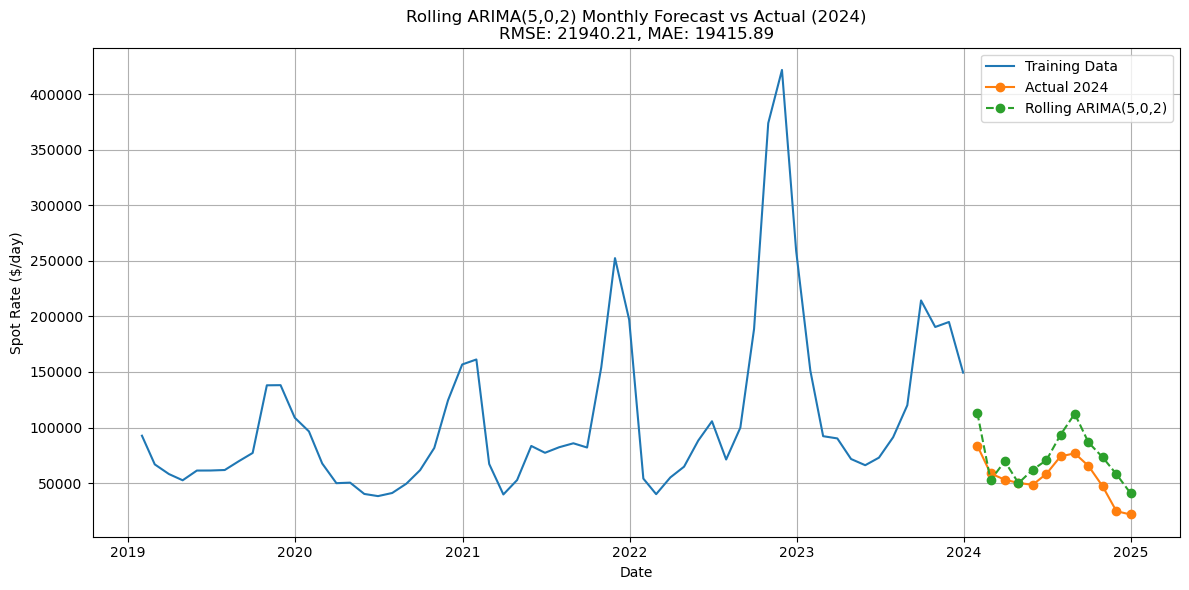

(21940.211467764264, 19415.8871263382)

In [28]:
# Re-run everything from scratch after environment reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and clean the dataset
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")

# Clean numeric column
df['174k MEGI / XDF'] = (
    df['174k MEGI / XDF']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .astype(float)
)

# Resample to monthly average
df_monthly = df.set_index('Date').resample('M').mean(numeric_only=True).reset_index()

# Split into train and test
train_monthly = df_monthly[df_monthly['Date'] < '2024-01-01'].copy()
test_monthly = df_monthly[(df_monthly['Date'] >= '2024-01-01') & (df_monthly['Date'] <= '2024-12-31')].copy()

# Rolling ARIMA(5,0,2)
rolling_predictions_502 = []
train_rolling_502 = train_monthly.copy()

for idx, row in test_monthly.iterrows():
    model_502 = ARIMA(train_rolling_502['174k MEGI / XDF'], order=(5, 0, 2))
    fitted_502 = model_502.fit()
    pred_502 = fitted_502.forecast(steps=1)
    rolling_predictions_502.append(pred_502.iloc[0])
    
    new_row = pd.DataFrame({
        'Date': [row['Date']],
        '174k MEGI / XDF': [row['174k MEGI / XDF']]
    })
    train_rolling_502 = pd.concat([train_rolling_502, new_row], ignore_index=True)

# Convert to series and evaluate
pred_series_502 = pd.Series(rolling_predictions_502, index=test_monthly['Date'])
rmse_502 = np.sqrt(mean_squared_error(test_monthly['174k MEGI / XDF'], pred_series_502))
mae_502 = mean_absolute_error(test_monthly['174k MEGI / XDF'], pred_series_502)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_monthly['Date'], train_monthly['174k MEGI / XDF'], label='Training Data')
plt.plot(test_monthly['Date'], test_monthly['174k MEGI / XDF'], label='Actual 2024', marker='o')
plt.plot(pred_series_502.index, pred_series_502.values, label='Rolling ARIMA(5,0,2)', linestyle='--', marker='o')
plt.title(f'Rolling ARIMA(5,0,2) Monthly Forecast vs Actual (2024)\nRMSE: {rmse_502:.2f}, MAE: {mae_502:.2f}')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

rmse_502, mae_502


In [43]:
!pip install pmdarima



✅ Rolling auto_arima Forecast Results:
RMSE: 19344.30
MAE:  16819.75


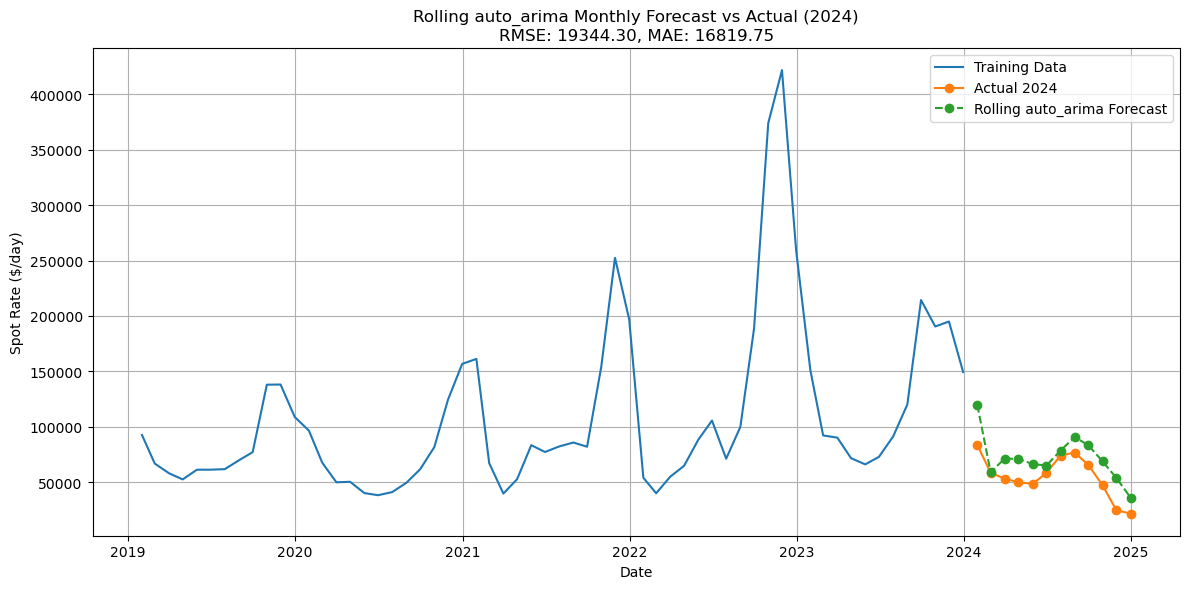

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# --- Load and clean the dataset ---
df = pd.read_csv("Spot charter rates - Fearnley LNG csv.csv", delimiter=';')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format="%d.%m.%Y")

# Clean numeric column
df['174k MEGI / XDF'] = (
    df['174k MEGI / XDF']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .astype(float)
)

# --- Resample to monthly average using 'ME' (month end) ---
df_monthly = df.set_index('Date').resample('ME').mean(numeric_only=True).reset_index()

# --- Split into training and test sets ---
train_monthly = df_monthly[df_monthly['Date'] < '2024-01-01'].copy()
test_monthly = df_monthly[(df_monthly['Date'] >= '2024-01-01') & (df_monthly['Date'] <= '2024-12-31')].copy()

# --- Rolling auto_arima forecast ---
rolling_predictions_auto = []
train_rolling_auto = train_monthly.copy()
failures = []

for idx, row in test_monthly.iterrows():
    series_std = train_rolling_auto['174k MEGI / XDF'].std()

    if series_std < 1e-3:
        rolling_predictions_auto.append(np.nan)
        failures.append((idx, row['Date'], 'Low Variance'))
        continue

    try:
        model_auto = auto_arima(
            train_rolling_auto['174k MEGI / XDF'],
            seasonal=False,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_p=5, max_q=5, max_order=None,
            d=None
        )

        pred = model_auto.predict(n_periods=1)
        rolling_predictions_auto.append(pred.iloc[0])  # ✅ Fixed here

    except Exception as e:
        rolling_predictions_auto.append(np.nan)
        failures.append((idx, row['Date'], str(e)))

    # Append actual observation to training
    new_row = pd.DataFrame({
        'Date': [row['Date']],
        '174k MEGI / XDF': [row['174k MEGI / XDF']]
    })
    train_rolling_auto = pd.concat([train_rolling_auto, new_row], ignore_index=True)

# --- Evaluate results ---
pred_series_auto = pd.Series(rolling_predictions_auto, index=test_monthly['Date'])

combined = pd.DataFrame({
    'actual': test_monthly.set_index('Date')['174k MEGI / XDF'],
    'forecast': pred_series_auto
}).dropna()

if len(combined) == 0:
    print("⚠️ No valid forecasts were generated.")
else:
    rmse_auto = np.sqrt(mean_squared_error(combined['actual'], combined['forecast']))
    mae_auto = mean_absolute_error(combined['actual'], combined['forecast'])

    print(f"\n✅ Rolling auto_arima Forecast Results:")
    print(f"RMSE: {rmse_auto:.2f}")
    print(f"MAE:  {mae_auto:.2f}")

    plt.figure(figsize=(12, 6))
    plt.plot(train_monthly['Date'], train_monthly['174k MEGI / XDF'], label='Training Data')
    plt.plot(combined.index, combined['actual'], label='Actual 2024', marker='o')
    plt.plot(combined.index, combined['forecast'], label='Rolling auto_arima Forecast', linestyle='--', marker='o')
    plt.title(f'Rolling auto_arima Monthly Forecast vs Actual (2024)\nRMSE: {rmse_auto:.2f}, MAE: {mae_auto:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Spot Rate ($/day)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Optional: print failure summary ---
if failures:
    failures_df = pd.DataFrame(failures, columns=['Index', 'Date', 'Reason'])
    print("\n⚠️ Forecast Failures Summary:")
    print(failures_df)


In [57]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima

# Box-Cox-safe: Only apply to positive values
train_vals = train_monthly['174k MEGI / XDF'].values
train_vals = train_vals[train_vals > 0]  # Filter out non-positive values

# Fit Box-Cox transformation
boxcox_transformed, lambda_bc = boxcox(train_vals)

# Rebuild transformed training set with matching dates
train_rolling_bc = pd.DataFrame({
    'Date': train_monthly.loc[train_monthly['174k MEGI / XDF'] > 0, 'Date'],
    'Transformed': boxcox_transformed
})

rolling_predictions_bc = []

for idx, row in test_monthly.iterrows():
    try:
        model = auto_arima(
            train_rolling_bc['Transformed'],
            seasonal=False,
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_p=5,
            max_q=5,
            d=None
        )

        pred = model.predict(n_periods=1)
        forecast_value = inv_boxcox(pred.iloc[0], lambda_bc)  # ✅ FIXED HERE
        rolling_predictions_bc.append(forecast_value)

    except Exception as e:
        print(f"⚠️ Forecast failed at {row['Date'].date()} — {type(e).__name__}: {e}")
        rolling_predictions_bc.append(np.nan)

    # Append transformed actual to training if valid
    actual = row['174k MEGI / XDF']
    if actual > 0:
        transformed_val = boxcox([actual], lmbda=lambda_bc)[0]
        train_rolling_bc = pd.concat([
            train_rolling_bc,
            pd.DataFrame({'Date': [row['Date']], 'Transformed': [transformed_val]})
        ], ignore_index=True)
    else:
        print(f"⚠️ Skipping update at {row['Date'].date()} due to non-positive value.")

# Wrap forecast series
pred_series_bc = pd.Series(rolling_predictions_bc, index=test_monthly['Date'])
print("\n✅ Non-NaN Forecast Values:\n", pred_series_bc.dropna())

# Evaluate if forecasts exist
combined_bc = pd.DataFrame({
    'actual': test_monthly.set_index('Date')['174k MEGI / XDF'],
    'forecast': pred_series_bc
}).dropna()

if len(combined_bc) == 0:
    print("\n❌ No valid forecasts were generated — cannot compute RMSE/MAE.")
else:
    rmse_bc = np.sqrt(mean_squared_error(combined_bc['actual'], combined_bc['forecast']))
    mae_bc = mean_absolute_error(combined_bc['actual'], combined_bc['forecast'])
    print(f"\n📊 Box-Cox Rolling auto_arima Forecast Results:")
    print(f"RMSE: {rmse_bc:.2f}")
    print(f"MAE:  {mae_bc:.2f}")
    print(f"λ (Box-Cox): {lambda_bc:.4f}")



✅ Non-NaN Forecast Values:
 Date
2024-01-31    112869.004266
2024-02-29     72129.193478
2024-03-31     54509.814047
2024-04-30     57712.111027
2024-05-31     56439.098520
2024-06-30     55596.558881
2024-07-31     73334.700778
2024-08-31     89481.937187
2024-09-30     79929.864880
2024-10-31     64091.054533
2024-11-30     46007.853285
2024-12-31     22794.670083
dtype: float64

📊 Box-Cox Rolling auto_arima Forecast Results:
RMSE: 13811.33
MAE:  10832.99
λ (Box-Cox): -0.5407


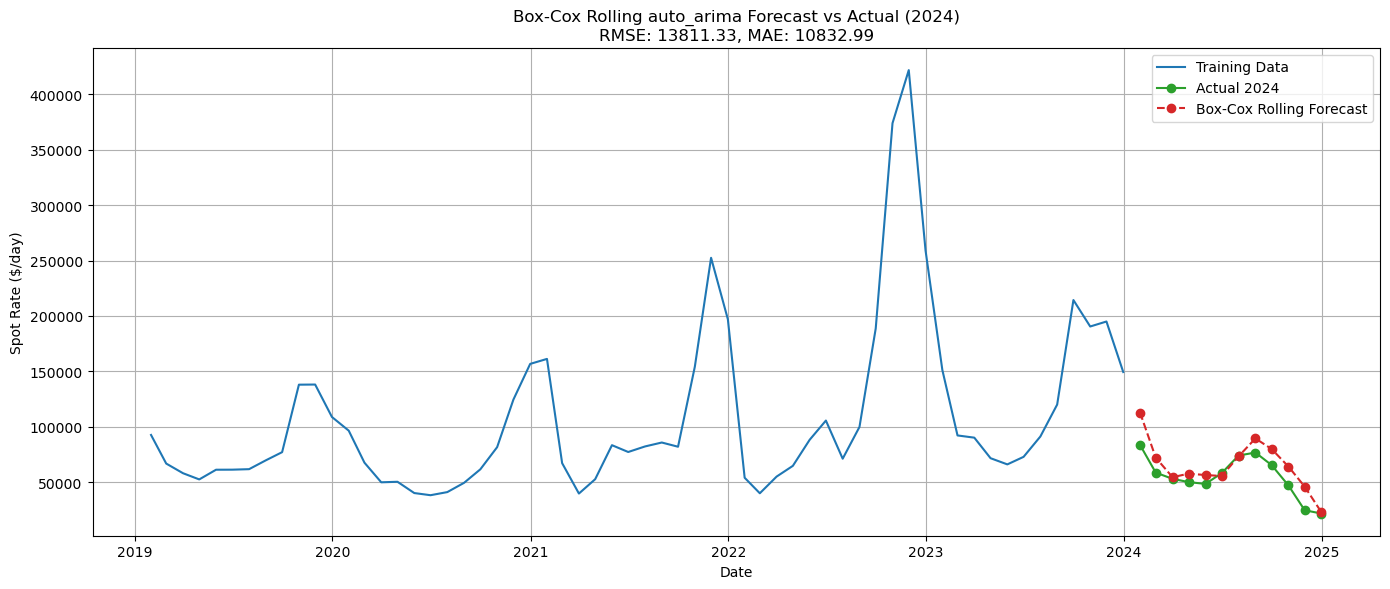

In [61]:
import matplotlib.pyplot as plt

# Combine all data for plotting
full_plot_df = pd.concat([
    train_monthly.set_index('Date')[['174k MEGI / XDF']],
    combined_bc[['actual', 'forecast']]
], axis=1)

# Rename for clarity
full_plot_df = full_plot_df.rename(columns={'174k MEGI / XDF': 'Training Data', 'actual': 'Actual 2024', 'forecast': 'Forecast 2024'})

# Plot full period
plt.figure(figsize=(14, 6))
plt.plot(full_plot_df.index, full_plot_df['Training Data'], label='Training Data', color='tab:blue')
plt.plot(full_plot_df.index, full_plot_df['Actual 2024'], label='Actual 2024', color='tab:green', marker='o')
plt.plot(full_plot_df.index, full_plot_df['Forecast 2024'], label='Box-Cox Rolling Forecast', color='tab:red', linestyle='--', marker='o')

plt.title(f'Box-Cox Rolling auto_arima Forecast vs Actual (2024)\nRMSE: {rmse_bc:.2f}, MAE: {mae_bc:.2f}')
plt.xlabel('Date')
plt.ylabel('Spot Rate ($/day)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
